# Import libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [19]:
from fbprophet import Prophet

# Import Dataset

In [20]:
dataset = pd.read_csv('avocado.csv')

# Explore Dataset

In [21]:
dataset = dataset.sort_values('Date')

In [22]:
dataset

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
9018,0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
18141,0,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
17673,0,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California


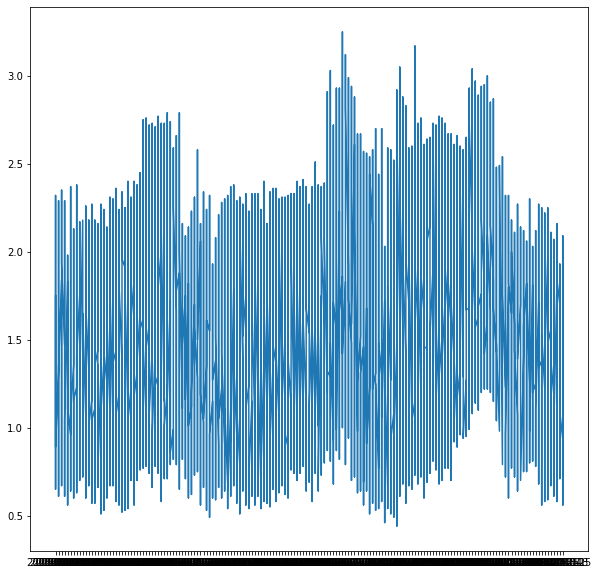

In [23]:
plt.figure(figsize=(10,10))
plt.plot(dataset['Date'],dataset['AveragePrice'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Southeast'),
  Text(1, 0, 'Chicago'),
  Text(2, 0, 'HarrisburgScranton'),
  Text(3, 0, 'Pittsburgh'),
  Text(4, 0, 'Boise'),
  Text(5, 0, 'WestTexNewMexico'),
  Text(6, 0, 'LosAngeles'),
  Text(7, 0, 'LasVegas'),
  Text(8, 0, 'Atlanta'),
  Text(9, 0, 'DallasFtWorth'),
  Text(10, 0, 'MiamiFtLauderdale'),
  Text(11, 0, 'Plains'),
  Text(12, 0, 'StLouis'),
  Text(13, 0, 'Syracuse'),
  Text(14, 0, 'Midsouth'),
  Text(15, 0, 'Sacramento'),
  Text(16, 0, 'Boston'),
  Text(17, 0, 'Charlotte'),
  Text(18, 0, 'Spokane'),
  Text(19, 0, 'Albany'),
  Text(20, 0, 'Houston'),
  Text(21, 0, 'SouthCarolina'),
  Text(22, 0, 'SanFrancisco'),
  Text(23, 0, 'TotalUS'),
  Text(24, 0, 'RaleighGreensboro'),
  Text(25, 0, 'BuffaloRochester'),
  Text(

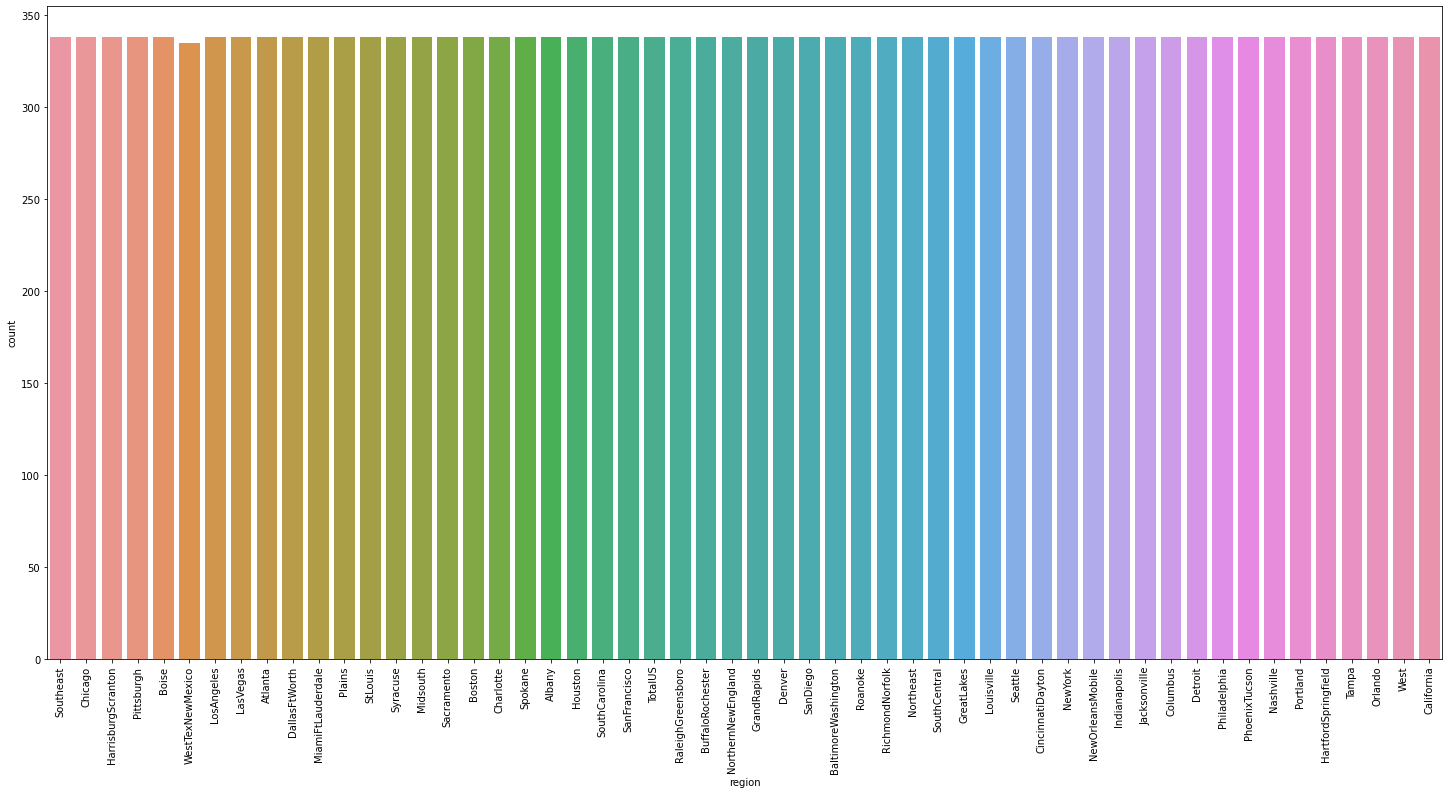

In [24]:
plt.figure(figsize=(25,12))
sns.countplot(x='region', data=dataset)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='year', ylabel='count'>

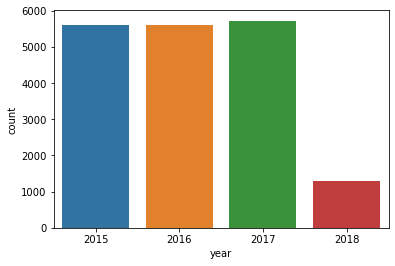

In [25]:
sns.countplot(x='year', data=dataset)

# Building Forecast Model

In [26]:
X = dataset[['Date', 'AveragePrice']]

In [28]:
X = X.rename(columns={'Date':'ds', 'AveragePrice':'y'})

In [29]:
model = Prophet()

In [30]:
model.fit(X)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [32]:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

In [33]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.496718,0.894762,1.882312,1.496718,1.496718,-0.112798,-0.112798,-0.112798,-0.112798,-0.112798,-0.112798,0.0,0.0,0.0,1.383920
1,2015-01-11,1.491718,0.869501,1.842319,1.491718,1.491718,-0.104291,-0.104291,-0.104291,-0.104291,-0.104291,-0.104291,0.0,0.0,0.0,1.387427
2,2015-01-18,1.486719,0.928660,1.840290,1.486719,1.486719,-0.103991,-0.103991,-0.103991,-0.103991,-0.103991,-0.103991,0.0,0.0,0.0,1.382728
3,2015-01-25,1.481720,0.877093,1.839807,1.481720,1.481720,-0.123042,-0.123042,-0.123042,-0.123042,-0.123042,-0.123042,0.0,0.0,0.0,1.358678
4,2015-02-01,1.476721,0.852756,1.756236,1.476721,1.476721,-0.151522,-0.151522,-0.151522,-0.151522,-0.151522,-0.151522,0.0,0.0,0.0,1.325199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.164538,0.569713,1.622770,0.982065,1.358465,-0.086418,-0.086418,-0.086418,-0.086418,-0.086418,-0.086418,0.0,0.0,0.0,1.078120
530,2019-03-22,1.163813,0.573015,1.594048,0.980650,1.358327,-0.084748,-0.084748,-0.084748,-0.084748,-0.084748,-0.084748,0.0,0.0,0.0,1.079065
531,2019-03-23,1.163088,0.581809,1.587819,0.978918,1.358190,-0.082805,-0.082805,-0.082805,-0.082805,-0.082805,-0.082805,0.0,0.0,0.0,1.080283
532,2019-03-24,1.162363,0.563815,1.630289,0.977298,1.358052,-0.080608,-0.080608,-0.080608,-0.080608,-0.080608,-0.080608,0.0,0.0,0.0,1.081756


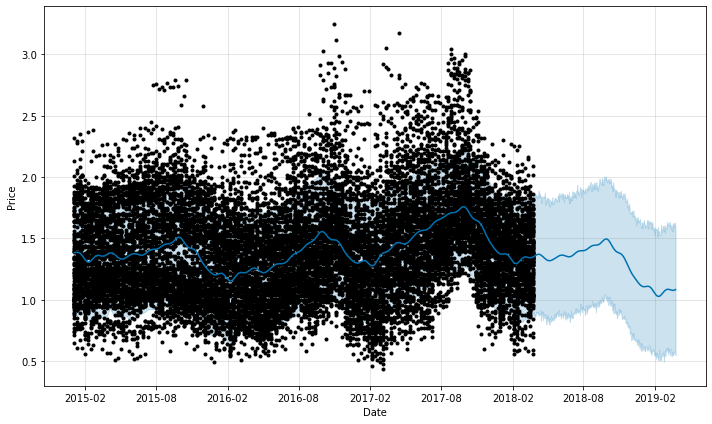

In [35]:
figure = model.plot(forecast, xlabel='Date', ylabel='Price')

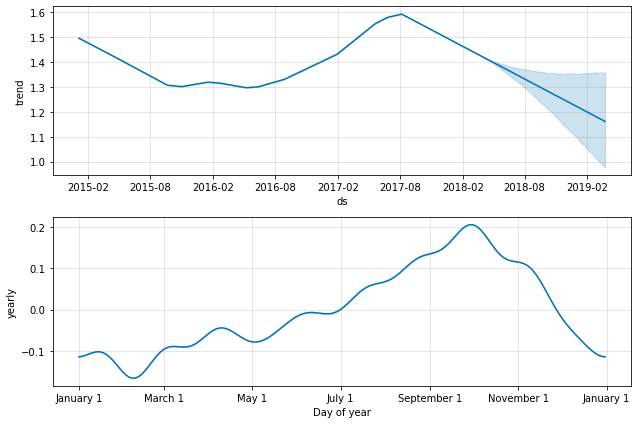

In [36]:
figure = model.plot_components(forecast)

# Subset - Specific region

In [49]:
X_West = dataset[dataset['region']=='West']

In [50]:
X_West = X_West.sort_values('Date')

In [53]:
X_West

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
2753,49,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9104,2,2018-03-11,1.00,6906412.50,2442241.76,1695925.97,130983.00,2637261.77,1435608.59,1184730.56,16922.62,conventional,2018,West
18226,1,2018-03-18,1.73,210067.47,33437.98,47165.54,110.40,129353.55,73163.12,56020.24,170.19,organic,2018,West
9103,1,2018-03-18,0.99,7254940.65,2099082.66,1707752.84,115997.93,3332107.22,1333247.05,1982086.02,16774.15,conventional,2018,West
9102,0,2018-03-25,0.93,7667064.46,2567279.74,1912986.38,118289.91,3068508.43,1309580.19,1745630.06,13298.18,conventional,2018,West


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


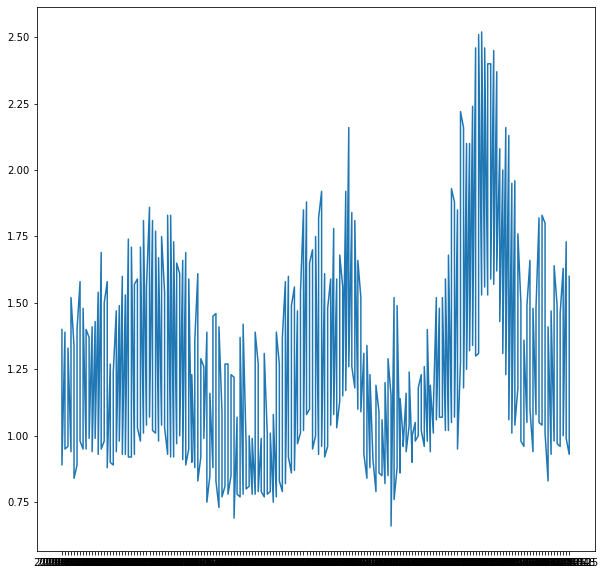

In [52]:
plt.figure(figsize=(10,10))
plt.plot(X_West['Date'], X_West['AveragePrice'])

In [56]:
X_x = X_West[['Date', 'AveragePrice']]
X_x = X_x.rename(columns={'Date':'ds', 'AveragePrice':'y'})

In [57]:
X_x

,ds,y
11881,2015-01-04,1.40
2755,2015-01-04,0.89
11880,2015-01-11,1.39
2754,2015-01-11,0.95
2753,2015-01-18,0.96
...,...,...
9104,2018-03-11,1.00
18226,2018-03-18,1.73
9103,2018-03-18,0.99
9102,2018-03-25,0.93


In [59]:
model1 = Prophet()
model1.fit(X_x)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [62]:
future1 = model1.make_future_dataframe(periods=365)
forecast1 = model1.predict(future1)

In [63]:
forecast1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.287863,0.694444,1.507866,1.287863,1.287863,-0.187261,-0.187261,-0.187261,-0.187261,-0.187261,-0.187261,0.0,0.0,0.0,1.100602
1,2015-01-11,1.285615,0.699523,1.500785,1.285615,1.285615,-0.171195,-0.171195,-0.171195,-0.171195,-0.171195,-0.171195,0.0,0.0,0.0,1.114421
2,2015-01-18,1.283368,0.666390,1.545991,1.283368,1.283368,-0.162675,-0.162675,-0.162675,-0.162675,-0.162675,-0.162675,0.0,0.0,0.0,1.120692
3,2015-01-25,1.281120,0.692870,1.547034,1.281120,1.281120,-0.174019,-0.174019,-0.174019,-0.174019,-0.174019,-0.174019,0.0,0.0,0.0,1.107101
4,2015-02-01,1.278872,0.647469,1.513048,1.278872,1.278872,-0.195008,-0.195008,-0.195008,-0.195008,-0.195008,-0.195008,0.0,0.0,0.0,1.083864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.725121,1.084873,1.926172,1.690217,1.760608,-0.206691,-0.206691,-0.206691,-0.206691,-0.206691,-0.206691,0.0,0.0,0.0,1.518430
530,2019-03-22,1.725679,1.113011,1.922232,1.690691,1.761310,-0.201700,-0.201700,-0.201700,-0.201700,-0.201700,-0.201700,0.0,0.0,0.0,1.523979
531,2019-03-23,1.726238,1.142304,1.969116,1.691152,1.761988,-0.196146,-0.196146,-0.196146,-0.196146,-0.196146,-0.196146,0.0,0.0,0.0,1.530092
532,2019-03-24,1.726796,1.083005,1.958930,1.691477,1.762665,-0.190131,-0.190131,-0.190131,-0.190131,-0.190131,-0.190131,0.0,0.0,0.0,1.536666


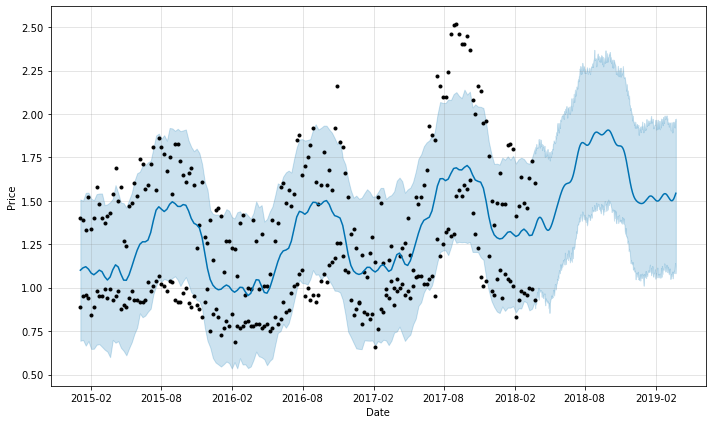

In [64]:
figure = model1.plot(forecast1, xlabel='Date', ylabel='Price')

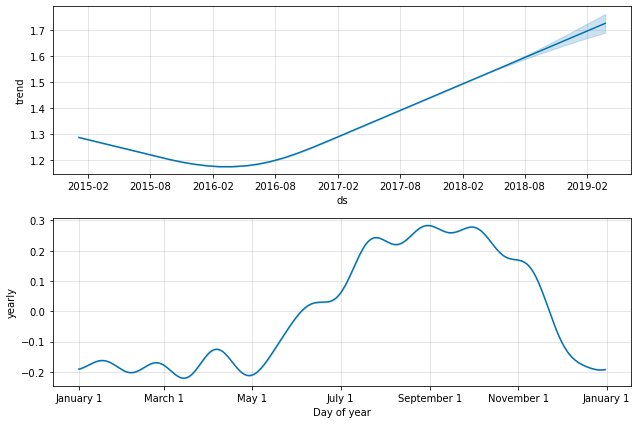

In [66]:
figure = model1.plot_components(forecast1)